# Projet Deep Learning Kévin CORTIAL et William GIRALDO

## Librairie utilisées

In [25]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import time

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout
from keras.models import load_model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Importation des bases de données

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


## Introduction

CIFAR est un acronyme qui signifie Canadian Institute For Advanced Research. L'ensemble des données CIFAR ont été développé par des chercheurs de l'institut CIFAR.

L'ensemble des données comprend 60 000 photographies couleur 32 × 32 pixels d'objets de 10 classes. Les étiquettes des classes et leurs valeurs entières associées sont répertoriées ci-dessous.

- 0: avion
- 1: automobile
- 2: oiseau
- 3: chat
- 4: cerf
- 5: chien
- 6: grenouille
- 7: cheval
- 8: bateau
- 9: camion

Ce sont de très petites images, beaucoup plus petites qu'une photographie typique, et l'ensemble de données était destiné à la recherche en vision par ordinateur.

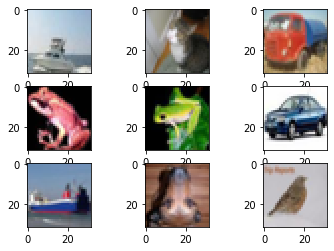

In [4]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i+100])
# show the figure
plt.show()

Une visualisation de neuf  images de l'ensemble de données est présenté ci dessus. Il est clair que les images sont en effet très petites par rapport aux photographies modernes. Ainsi, il peut être difficile de voir ce qui est représenté exactement dans certaines images étant donné que la résolution est extrêmement basse.

## Codage One Hot encoding pour les données catégorie

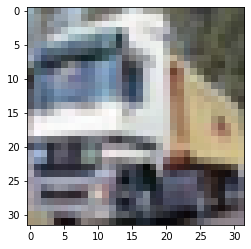

Avant [9]
Après [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [5]:
# Recodage des données sous forme "One Hot encoding"
plt.imshow(X_train[1])
plt.show()
print('Avant', y_train[1] )
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Après', y_train[1] )

## Normalisation des données

In [6]:
# Nous convertissons les données des pixels en réel
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')
# Puis, nous normalisons les données en divisant les valeurs des pixels par la valeur maximale possible : 255.
train_norm = train_norm / 255
test_norm = test_norm / 255

## Construction du modèle

Pour la construction du modèle, Nous n'avons pas utilisé de modèle près entrainé comme VGG16 mais nous nous sommes inspirés de l'architecture de ces modèles.

En effet, l'architecture VGG implique l'empilement de couches convolutives avec de petits filtres 3 × 3 suivis d'une couche de regroupement maximale (MaxPooling2D). Ensemble, ces couches forment un bloc et le nombre de filtres dans chaque couche augmente avec la profondeur du réseau, comme 32, 64, 128 pour les 3 premiers blocs du modèle. L'option "padding" est utilisé sur les couches convolutives pour garantir que la hauteur et la largeur des données en sortie correspondent aux entrées.

Pour chaque couche, nous utilisons la fonction activation 'relu' qui est la plus courante.

Après, avoir caratérisé les données en entrée, le réseau doit prédire à quelle classe appartient l'image à partir de ces caractéristiques. Pour cela, nous aplatissons les caractéristiques de l'image "model.add(Flatten())". Enfin, la couche de sortie doit avoir 10 noeuds pour les 10 classes et utiliser la fonction d'activation softmax.

Pour finir, nous compilons notre réseau en utilisant l'optimisateur 'adam' et surveillera la qualité de la classification en mettant "accuracy" en métrique.

In [7]:
model = Sequential() 

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

## Apprentissage du modèle

L'ensemble des données de test est utilisé en données de validation et évalué à la fin de chaque epoch d'apprentissage. Cela nous permettera de tracer des scores d'évaluation du modèle sur le test à chaque epoch.

In [8]:
evolution = model.fit(X_train, y_train,
         batch_size=100,
         epochs=120,
         verbose=2,
         validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/120
 - 293s - loss: 1.6670 - accuracy: 0.4298 - val_loss: 1.2644 - val_accuracy: 0.5444
Epoch 2/120
 - 284s - loss: 1.1218 - accuracy: 0.6058 - val_loss: 1.0690 - val_accuracy: 0.6289
Epoch 3/120
 - 285s - loss: 0.8971 - accuracy: 0.6862 - val_loss: 0.9077 - val_accuracy: 0.6877
Epoch 4/120
 - 285s - loss: 0.7635 - accuracy: 0.7324 - val_loss: 0.8293 - val_accuracy: 0.7211
Epoch 5/120
 - 287s - loss: 0.6613 - accuracy: 0.7695 - val_loss: 0.8742 - val_accuracy: 0.7001
Epoch 6/120
 - 285s - loss: 0.5770 - accuracy: 0.7965 - val_loss: 0.7823 - val_accuracy: 0.7402
Epoch 7/120
 - 284s - loss: 0.5090 - accuracy: 0.8224 - val_loss: 0.8166 - val_accuracy: 0.7380
Epoch 8/120
 - 285s - loss: 0.4531 - accuracy: 0.8412 - val_loss: 0.8386 - val_accuracy: 0.7312
Epoch 9/120
 - 284s - loss: 0.4066 - accuracy: 0.8548 - val_loss: 0.9325 - val_accuracy: 0.7219
Epoch 10/120
 - 284s - loss: 0.3538 - accuracy: 0.8756 - val_loss: 0.9040 - val_accura

 - 285s - loss: 0.1278 - accuracy: 0.9641 - val_loss: 1.9977 - val_accuracy: 0.7266
Epoch 86/120
 - 285s - loss: 0.1040 - accuracy: 0.9711 - val_loss: 2.2403 - val_accuracy: 0.7401
Epoch 87/120
 - 285s - loss: 0.1128 - accuracy: 0.9684 - val_loss: 2.2902 - val_accuracy: 0.7307
Epoch 88/120
 - 285s - loss: 0.0996 - accuracy: 0.9720 - val_loss: 2.2373 - val_accuracy: 0.7412
Epoch 89/120
 - 285s - loss: 0.1200 - accuracy: 0.9680 - val_loss: 2.4266 - val_accuracy: 0.7226
Epoch 90/120
 - 285s - loss: 0.1082 - accuracy: 0.9695 - val_loss: 2.1571 - val_accuracy: 0.7361
Epoch 91/120
 - 285s - loss: 0.1054 - accuracy: 0.9712 - val_loss: 2.5750 - val_accuracy: 0.7284
Epoch 92/120
 - 284s - loss: 0.1164 - accuracy: 0.9695 - val_loss: 2.3118 - val_accuracy: 0.7355
Epoch 93/120
 - 285s - loss: 0.1099 - accuracy: 0.9709 - val_loss: 2.3296 - val_accuracy: 0.7185
Epoch 94/120
 - 285s - loss: 0.1206 - accuracy: 0.9678 - val_loss: 2.5111 - val_accuracy: 0.7263
Epoch 95/120
 - 285s - loss: 0.1075 - accur

In [9]:
model.save('model_3blocs.test') #Sauvegarde du modèle

In [10]:
model_load = load_model('model_3blocs.test') #Chargement du modèle sauvegardé

## Visualisation

Les lignes bleues indiquent les performances du modèle sur l'ensemble de données d'apprentissage et les lignes orange indiquent les performances sur l'ensemble de données de test.

Cela nous permet de visualiser le comportement d'apprentissage du modèle pendant l'apprentissage et l'estimation des performances du modèle.

Malheureusement, nous pouvons voir que le modèle surpasse rapidement l'ensemble de données de test. Nous pouvons voir que les performances du modèle sur l'ensemble de données d'apprentissage continuent de s'améliorer tandis que les performances sur l'ensemble de données de test s'améliorent, puis reste bloqué à environ 70% d'accuracy. 

**Nous avons donc un problème surapprentissage du modèle sur les données d'apprentissage (train).**

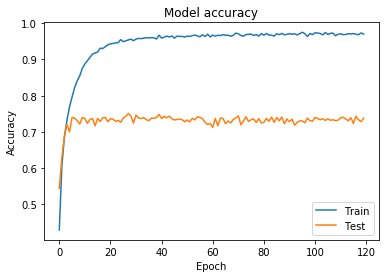

In [11]:
plt.plot(evolution.history['accuracy'])
plt.plot(evolution.history['val_accuracy'])
plt.title("Model accuracy")
plt.legend(["Train", "Test"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

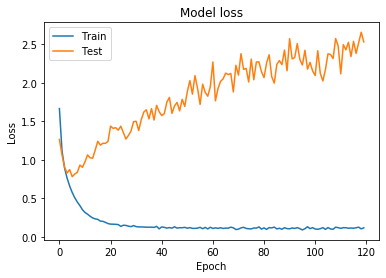

In [12]:
#Visualisation
plt.plot(evolution.history['loss'])
plt.plot(evolution.history['val_loss'])
plt.title("Model loss")
plt.legend(["Train", "Test"])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [13]:
score= model.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 31s 3ms/step
[2.5333837271690367, 0.7378000020980835]


# Résolution du problème d'overfitting

Pour résoudre le problème de sur-apprentissage (overfitting) du modèle sur les données d'entrainement. Nous avons mis en place une méthode de régularisation (parmi d'autres) pour ralentir la convergence du modèle notament.

Le décrochage est une technique simple qui supprime de manière aléatoire des noeuds du réseau. Il a un effet de régularisation, car les noeuds restants doivent s'adapter pour prendre le relais des noeuds supprimés.

Dans ce cas, nous ajoutons des couches d'abandon "model2.add(Dropout(0.2))" après chaque couche de regroupement maximale.
Nous avons utilisé un taux d'abandon fixe de 20% et donc le modèle conserve 80% de ces noeuds.

In [14]:
model2 = Sequential() 

model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.2)) #Suppression de 20% des noeuds

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.2)) #Suppression de 20% des noeuds

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.2)) #Suppression de 20% des noeuds

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))

model2.add(Dropout(0.2)) #Suppression de 20% des noeuds

model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)         

## Apprentissage du modèle

L'ensemble de données de test est utilisé comme un ensemble de données de validation et évalué à la fin de chaque epoch d'apprentissage. Cela nous permet de tracer des scores d'évaluation du modèle sur le train et l'ensemble de données de test à chaque epoch.

In [15]:
evolution2 = model2.fit(X_train, y_train,
         batch_size=100,
         epochs=120,
         verbose=2,
         validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/120
 - 311s - loss: 1.9357 - accuracy: 0.3323 - val_loss: 1.5109 - val_accuracy: 0.4495
Epoch 2/120
 - 307s - loss: 1.3607 - accuracy: 0.5081 - val_loss: 1.2548 - val_accuracy: 0.5635
Epoch 3/120
 - 307s - loss: 1.1538 - accuracy: 0.5888 - val_loss: 0.9926 - val_accuracy: 0.6518
Epoch 4/120
 - 308s - loss: 1.0202 - accuracy: 0.6419 - val_loss: 0.9152 - val_accuracy: 0.6818
Epoch 5/120
 - 307s - loss: 0.9313 - accuracy: 0.6733 - val_loss: 0.8237 - val_accuracy: 0.7116
Epoch 6/120
 - 306s - loss: 0.8618 - accuracy: 0.7000 - val_loss: 0.7881 - val_accuracy: 0.7268
Epoch 7/120
 - 307s - loss: 0.8138 - accuracy: 0.7173 - val_loss: 0.7587 - val_accuracy: 0.7418
Epoch 8/120
 - 307s - loss: 0.7773 - accuracy: 0.7319 - val_loss: 0.7333 - val_accuracy: 0.7508
Epoch 9/120
 - 306s - loss: 0.7430 - accuracy: 0.7415 - val_loss: 0.7576 - val_accuracy: 0.7410
Epoch 10/120
 - 306s - loss: 0.7135 - accuracy: 0.7530 - val_loss: 0.7417 - val_accura

 - 310s - loss: 0.3936 - accuracy: 0.8693 - val_loss: 0.6815 - val_accuracy: 0.8001
Epoch 86/120
 - 309s - loss: 0.4043 - accuracy: 0.8629 - val_loss: 0.7414 - val_accuracy: 0.7960
Epoch 87/120
 - 309s - loss: 0.4074 - accuracy: 0.8642 - val_loss: 0.7373 - val_accuracy: 0.7880
Epoch 88/120
 - 309s - loss: 0.4071 - accuracy: 0.8653 - val_loss: 0.7804 - val_accuracy: 0.7832
Epoch 89/120
 - 310s - loss: 0.3966 - accuracy: 0.8677 - val_loss: 0.7100 - val_accuracy: 0.7916
Epoch 90/120
 - 310s - loss: 0.4033 - accuracy: 0.8655 - val_loss: 0.7330 - val_accuracy: 0.7881
Epoch 91/120
 - 310s - loss: 0.4074 - accuracy: 0.8641 - val_loss: 0.7263 - val_accuracy: 0.7984
Epoch 92/120
 - 309s - loss: 0.4075 - accuracy: 0.8652 - val_loss: 0.7342 - val_accuracy: 0.7976
Epoch 93/120
 - 310s - loss: 0.4100 - accuracy: 0.8631 - val_loss: 0.7289 - val_accuracy: 0.8007
Epoch 94/120
 - 310s - loss: 0.3839 - accuracy: 0.8717 - val_loss: 0.7453 - val_accuracy: 0.7982
Epoch 95/120
 - 311s - loss: 0.4043 - accur

In [16]:
model2.save('model_dropout.test')

In [17]:
model_load2 = load_model('model_dropout.test')

## Visualisation

Les lignes bleues indiquent les performances du modèle sur l'ensemble de données d'apprentissage et les lignes orange indiquent les performances sur l'ensemble de données de test.

Cela nous permet de visualiser le comportement d'apprentissage du modèle pendant l'apprentissage et l'estimation des performances du modèle.

Nous pouvons voir que les performances du modèle sur l'ensemble de données d'apprentissage continuent de s'améliorer et que les performances sur l'ensemble de données de test s'améliorent elles aussi pour atteindre environ 81% d'accuracy. 

Malheureusement, nous pouvons voir que le modèle overfit au bout de 20 epochs. Nous pouvons voir que les performances du modèle sur l'ensemble de données d'apprentissage continuent de s'améliorer tandis que les performances sur l'ensemble de données de test s'améliorent, puis reste bloqué à environ 80% d'accuracy. 

**Nous avons donc amélioré le problème de sur-apprentissage du modèle même si celui-ci continu à overfitter au bout de 20 epochs autour de 80% d'accuracy**

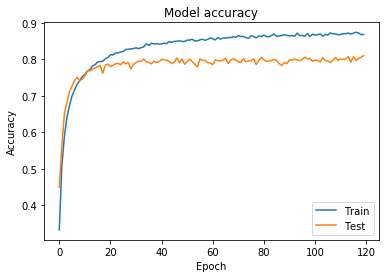

In [18]:
#Visualisation
plt.plot(evolution2.history['accuracy'])
plt.plot(evolution2.history['val_accuracy'])
plt.title("Model accuracy")
plt.legend(["Train", "Test"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

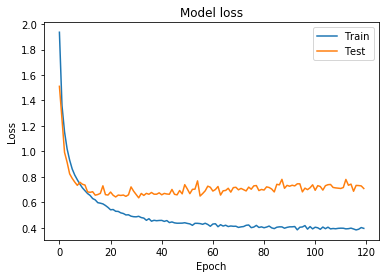

In [19]:
#Visualisation
plt.plot(evolution2.history['loss'])
plt.plot(evolution2.history['val_loss'])
plt.title("Model loss")
plt.legend(["Train", "Test"])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [20]:
score = model2.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 33s 3ms/step
[0.7085552560806274, 0.8100000023841858]


### Prédiction du modèle

In [21]:
y_pred = model2.predict(X_test) #Prédiction
y_pred =(y_pred>0.5) #Prédiction après que les données soit passé par la couche softmax

In [22]:
# Décodage des données
prediction = []
for i in range(len(y_pred)):
    inverted = np.argmax(y_pred[i])
    prediction.append(inverted)

In [23]:
# Décodage des données
y_test_decod = []
for i in range(len(y_test)):
    inverted = np.argmax(y_test[i])
    y_test_decod.append(inverted)

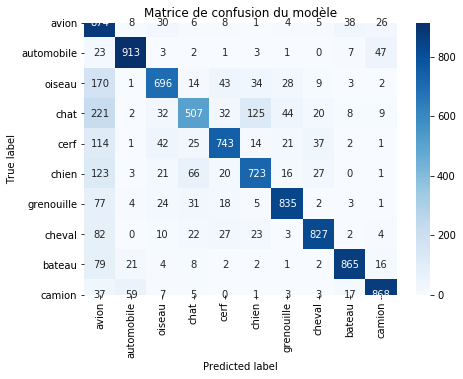

Le taux de bonne prédiction sur l'ensemble test est de  79.0 %


In [29]:
cm_df = pd.DataFrame(confusion_matrix(y_test_decod, prediction),
               index = ['avion','automobile','oiseau','chat','cerf','chien','grenouille','cheval','bateau','camion'],
               columns = ['avion','automobile','oiseau','chat','cerf','chien','grenouille','cheval','bateau','camion'])

plt.figure(figsize=(7,5))
seaborn.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
plt.title("Matrice de confusion du modèle")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("Le taux de bonne prédiction sur l'ensemble test est de ", np.round(accuracy_score(y_test_decod, prediction),2)*100, "%")

## Les pistes d'amélioration à mettre en place

Pour améliorer les performances du modèle, nous pourrions mettre en place des méthodes d'augmentation des données qui consistent à faire des copies des exemples dans l'ensemble de données de formation avec de petites modifications aléatoires.